In [1]:
import warnings

# Suppress specific warnings to streamline output
warnings.filterwarnings('ignore', category=DeprecationWarning)
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings("ignore", "is_categorical_dtype")
warnings.filterwarnings("ignore", "use_inf_as_na")

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gc
import plotly.express as px
import plotly.graph_objects as go
from colorama import Fore
from plotly.subplots import make_subplots

In [4]:
train = pd.read_csv("D:/Brist1d_Kaggle/Dataset/train.csv/train.csv")
test = pd.read_csv("D:/Brist1d_Kaggle/Dataset/test (1).csv")
submission = pd.read_csv("D:/Brist1d_Kaggle/Dataset/sample_submission.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_18500\1331221204.py:1: DtypeWarning: Columns (435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506) have mixed types. Specify dtype option on import or set low_memory=False.
  train = pd.read_csv("D:/Brist1d_Kaggle/Dataset/train.csv/train.csv")


In [5]:
sns.set_style('darkgrid')

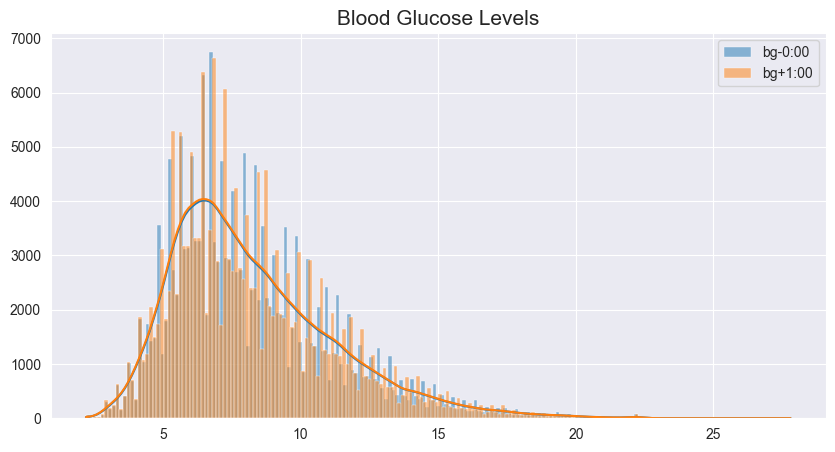

In [6]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 5))
sns.histplot(data=train, x="bg-0:00", kde=True, ax=ax, label="bg-0:00")
sns.histplot(data=train, x="bg+1:00", kde=True, ax=ax, label="bg+1:00")
ax.set_ylabel("")
ax.set_xlabel("")
ax.set_title("Blood Glucose Levels", fontsize=15)
ax.legend(loc="upper right")

In [7]:
bg_features = ["bg-0:00", "bg+1:00"]
train[bg_features].describe().T.style.bar(subset=['mean'], color='#7BCC70')\
    .background_gradient(subset=['std'], cmap='Reds')\
    .background_gradient(subset=['50%'], cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
bg-0:00,174328.000000,8.277378,2.990266,2.200000,6.100000,7.700000,9.900000,27.800000
bg+1:00,177024.000000,8.277045,2.996398,2.200000,6.100000,7.700000,9.900000,27.800000


In [8]:
from sklearn.metrics import mean_squared_error

train["pred"] = train[["bg-0:00", "bg-0:05"]].apply(
    lambda x: x["bg-0:00"] if not np.isnan(x["bg-0:00"]) 
    else x["bg-0:05"] if not np.isnan(x["bg-0:05"]) 
    else 8.277, 
    axis=1
)
rmse = mean_squared_error(train["bg+1:00"], train["pred"], squared=False)
print(f"{Fore.RED}-->{Fore.RESET} RMSE = {Fore.GREEN}{rmse}{Fore.RESET}")

--> RMSE = 2.3277874025246774


In [9]:
mean_value = test["bg-0:00"].mean()
submission["bg+1:00"] = test[["bg-0:00", "bg-0:05", "bg-0:10"]].apply(
    lambda x: x["bg-0:00"] if not np.isnan(x["bg-0:00"]) 
    else x["bg-0:05"] if not np.isnan(x["bg-0:05"]) 
    else x["bg-0:10"] if not np.isnan(x["bg-0:10"]) 
    else mean_value, 
    axis=1
)

In [10]:
submission.to_csv("submission.csv", index=False)
